# KNN算法介绍

## 1. 基本思想

KNN算法的核心思想非常简单：在训练集中选取距离输入点最近的K个邻居，根据这K个邻居中出现次数最多的类别(最大表决规则)，作为该数据点的类别。

## 2. 算法步骤

对位置类别属性的数据集中的每个点依次执行以下操作：
* 1）计算该点与所有已知类别的的点之间的距离；
* 2）按照距离递减排序，选取前k个点；
* 3）计算各类别在这k个点中出现的频率；
* 4）返回出现最高频率的类别作为当前点的预测分类。

## 3. 代码实例

In [76]:
from numpy import *

In [94]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 1. 数据准备

原始数据集为4个已标注的样本点，如图所示。

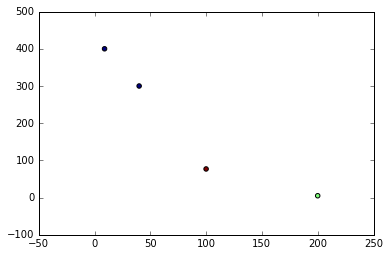

In [97]:
group =array([[9,400],[200,5],[100,77],[40,300]])  # 样本类
labels = ['1','2','3','1']
x = group[:, 0]
y = group[:, 1]
plt.scatter(x, y, c=labels)
plt.show()

待分类的点```inputPoint```如下所示，用(+）表示

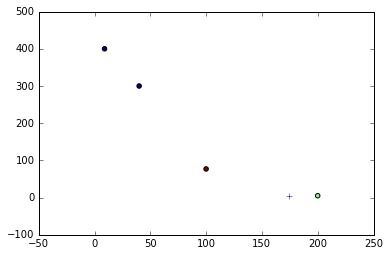

In [134]:
inputPoint = (174, 4)
plt.scatter(x, y, c=labels)
plt.plot(inputPoint[0], inputPoint[1], '+')
plt.show()

### 2. 计算距离

计算样本点inputPoint和所有原始点之间的距离。

In [135]:
dataSetSize = group.shape[0]
print dataSetSize

4


In [136]:
diffMat = tile(inputPoint, (dataSetSize, 1)) - group  # 分别计算该点与样本x, y差值
print diffMat

[[ 165 -396]
 [ -26   -1]
 [  74  -73]
 [ 134 -296]]


In [137]:
sqDiffMat = diffMat ** 2  # 计算方差
print sqDiffMat

[[ 27225 156816]
 [   676      1]
 [  5476   5329]
 [ 17956  87616]]


In [138]:
sqDistances = sqDiffMat.sum(axis=1)  # 距离平方和
print sqDistances

[184041    677  10805 105572]


In [139]:
distances = sqDistances ** 0.5  # 欧氏距离
print distances

[ 429.           26.01922366  103.94710193  324.91845131]


In [140]:
sortedDistIndicies = distances.argsort()  # 距离排序
print sortedDistIndicies

[1 2 3 0]


### 3. 取前k个点

选取距离最近的前k个点，获取其所属类别，并统计各个类别所占频率。

In [141]:
import operator
# 选择距离最小的k个点
classCount = {}
k = 1
for i in xrange(k):
    voteLabel = labels[sortedDistIndicies[i]]
    classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
print sortedClassCount

[('2', 1)]


### 4. 返回出现频率最高的类别

以出现频率最高的类别作为该inputPoint的类别。

In [142]:
print sortedClassCount[0][0]

2
